<a href="https://colab.research.google.com/github/danielsmithdevelopment/python-group-programming/blob/python-for-finance/portfolio_optimization_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Description: Program attempts to optimize a user's portfolio using Efficient Frontier

In [23]:
# Import libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [24]:
# Get stock symbols/tickers in portfolio
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG', 'MSFT', 'O', 'STAG', 'HON', 'RTX']

In [25]:
# Assign weights to stocks
weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [26]:
# Get the stock/portfolio starting date
stockStartDate = '2013-01-01'

In [27]:
# Get the stock/portfolio ending date
today = datetime.today().strftime('%Y-%m-%d')

In [28]:
# Create a dataframe to store the adjusted close price of stocks
df = pd.DataFrame()

# Store the adjusted close price of the stock into the dataframe
for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

In [29]:
# Show dataframe
df

,FB,AMZN,AAPL,NFLX,GOOG,MSFT,O,STAG,HON,RTX
Date,,,,,,,,,,
2013-01-02,28.000000,257.309998,68.378807,13.144286,360.274597,23.241472,29.039598,11.777233,52.177025,43.797398
2013-01-03,27.770000,258.480011,67.515701,13.798572,360.483826,22.930120,28.954830,11.680486,52.378479,43.959026
2013-01-04,28.760000,259.149994,65.635078,13.711429,367.607117,22.500971,29.195004,11.686932,53.450203,44.308376
2013-01-07,29.420000,268.459991,65.249001,14.171429,366.003143,22.458902,29.491674,11.751427,53.474392,44.094601
2013-01-08,29.059999,266.380005,65.424622,13.880000,365.280823,22.341091,29.618818,11.996520,52.974777,43.562771
...,...,...,...,...,...,...,...,...,...,...
2020-08-24,271.390015,3307.459961,503.429993,488.809998,1588.199951,213.690002,62.439999,32.202007,159.369995,61.880001
2020-08-25,280.820007,3346.489990,499.299988,490.579987,1608.219971,216.470001,62.570000,32.371391,164.529999,60.950001
2020-08-26,303.910004,3441.850098,506.089996,547.530029,1652.380005,221.149994,61.680000,32.471024,165.309998,60.770000


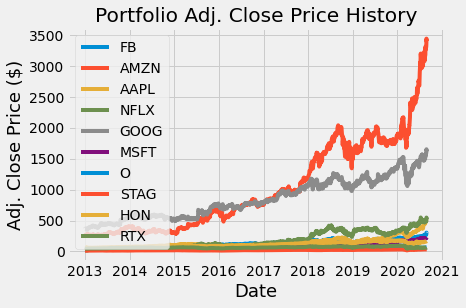

In [30]:
# Visually show the stock/portfolio
title = 'Portfolio Adj. Close Price History'

# Get the stocks
my_stocks = df

# Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Close Price ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [31]:
# Show the daily simple return
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG,MSFT,O,STAG,HON,RTX
Date,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581,-0.013396,-0.002919,-0.008215,0.003861,0.003690
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760,-0.018716,0.008295,0.000552,0.020461,0.007947
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363,-0.001870,0.010162,0.005519,0.000453,-0.004825
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974,-0.005246,0.004311,0.020856,-0.009343,-0.012061
...,...,...,...,...,...,...,...,...,...,...
2020-08-24,0.016404,0.006923,0.011960,-0.007109,0.004923,0.003145,0.021597,-0.009501,0.011873,0.026713
2020-08-25,0.034747,0.011801,-0.008204,0.003621,0.012605,0.013009,0.002082,0.005260,0.032378,-0.015029
2020-08-26,0.082223,0.028496,0.013599,0.116087,0.027459,0.021620,-0.014224,0.003078,0.004741,-0.002953


In [32]:
# Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG,MSFT,O,STAG,HON,RTX
FB,0.117905,0.052909,0.042439,0.055898,0.048968,0.042151,0.023756,0.029047,0.029484,0.028326
AMZN,0.052909,0.092589,0.036622,0.062029,0.046799,0.043458,0.015193,0.021684,0.022488,0.022609
AAPL,0.042439,0.036622,0.078189,0.032618,0.037227,0.042031,0.020738,0.027257,0.030259,0.030194
NFLX,0.055898,0.062029,0.032618,0.212853,0.049287,0.044175,0.013077,0.022356,0.023768,0.024371
GOOG,0.048968,0.046799,0.037227,0.049287,0.064868,0.043693,0.020601,0.026036,0.028739,0.029679
MSFT,0.042151,0.043458,0.042031,0.044175,0.043693,0.069174,0.025630,0.030846,0.031954,0.031669
O,0.023756,0.015193,0.020738,0.013077,0.020601,0.025630,0.074002,0.049297,0.029713,0.036497
STAG,0.029047,0.021684,0.027257,0.022356,0.026036,0.030846,0.049297,0.071049,0.031566,0.034872
HON,0.029484,0.022488,0.030259,0.023768,0.028739,0.031954,0.029713,0.031566,0.049340,0.042514
RTX,0.028326,0.022609,0.030194,0.024371,0.029679,0.031669,0.036497,0.034872,0.042514,0.065950


In [33]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.03924965724069116

In [34]:
# Calculate the portfolio volatility (standard deviation)
port_volatility = np.sqrt(port_variance)
port_volatility

0.19811526251324293

In [35]:
# Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.27637811879950236

In [36]:
# Show expected annual return, volatility (risk), and variance
percent_variance = str(round(port_variance, 2) * 100) + '%'
percent_volatility = str(round(port_volatility, 2) * 100) + '%'
percent_return = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: ' + percent_return)
print('Annual volatility/risk: ' + percent_volatility)
print('Annual variance: ' + percent_variance)

Expected annual return: 28.000000000000004%
Annual volatility/risk: 20.0%
Annual variance: 4.0%


In [42]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 1.6MB/s 


In [43]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [46]:
# Portfolio Optimization

# Calculate the expected returns and annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum Sharpe Ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('FB', 0.0965), ('AMZN', 0.20788), ('AAPL', 0.16955), ('NFLX', 0.25659), ('GOOG', 0.0), ('MSFT', 0.26881), ('O', 0.00067), ('STAG', 0.0), ('HON', 0.0), ('RTX', 0.0)])
Expected annual return: 40.6%
Annual volatility: 24.8%
Sharpe Ratio: 1.55


(0.40560366555363264, 0.24833498364014556, 1.5527561195824058)

In [47]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'FB': 5.0, 'AMZN': 1.0, 'AAPL': 5.0, 'NFLX': 7.0, 'MSFT': 17.0, 'O': 1.0}
Funds remaining: $11.61
